### Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('movies.csv/movies.csv')
df=data.copy()

In [2]:
print("dimensions of the dataset:", df.shape)
print("columns in the dataset:", list(df.columns))

print(df.info())

dimensions of the dataset: (9999, 9)
columns in the dataset: ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Gross']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None


In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

### 1.Type Casting

some features are not in their original type. so let's make it right.

here date,votes are not strings, lets convert them into their original type

In [5]:
df['YEAR']=df['YEAR'].str.strip('()')
df['YEAR']=df['YEAR'].str.rstrip('')
df['YEAR']=df['YEAR'].str.replace(r'[\-‒–—―−]+$', '', regex=True)

df['YEAR']

0            2021
1          2021– 
2       2010–2022
3          2013– 
4            2021
          ...    
9994       2021– 
9995       2021– 
9996       2022– 
9997       2021– 
9998       2021– 
Name: YEAR, Length: 9999, dtype: object

In [15]:
df[['START_YEAR','END_YEAR']]=df['YEAR'].str.extract(r'(\d{4})(?:[-–](\d{4}))?')
df.drop('YEAR',axis=1,inplace=True)


In [36]:
df['VOTES']=pd.to_numeric(df['VOTES'],errors='coerce')

In [37]:
df.dtypes

MOVIES         object
GENRE          object
RATING        float64
ONE-LINE       object
STARS          object
VOTES         float64
RunTime       float64
Gross          object
START_YEAR     object
END_YEAR       object
dtype: object

In [46]:
df['Gross']=pd.to_numeric(df['Gross'],errors='coerce')
df['START_YEAR']=pd.to_datetime(df['START_YEAR'],format='%Y')
df['END_YEAR']=pd.to_datetime(df['END_YEAR'],format='%Y')
df.dtypes


MOVIES                object
GENRE                 object
RATING               float64
ONE-LINE              object
STARS                 object
VOTES                float64
RunTime              float64
Gross                float64
START_YEAR    datetime64[ns]
END_YEAR      datetime64[ns]
dtype: object

In [47]:
df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,NaN,121.0,NaN,2021-01-01,NaT
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",NaN,25.0,NaN,2021-01-01,NaT
2,The Walking Dead,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",NaN,44.0,NaN,2010-01-01,2022-01-01
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",NaN,23.0,NaN,2013-01-01,NaT
4,Army of Thieves,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021-01-01,NaT


Done with Type casting and now let's clean the columns which have white spaces like'\n'

In [51]:
df['GENRE']=df['GENRE'].str.strip()
df['ONE-LINE']=df['ONE-LINE'].str.strip()
df['STARS']=df['STARS'].str.replace(r'\s+', '', regex=True)

df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,START_YEAR,END_YEAR
0,Blood Red Sky,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Director:PeterThorwarth|Stars:PeriBaumeister,C...",NaN,121.0,NaN,2021-01-01,NaT
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:ChrisWood,SarahMichelleGellar,LenaHeadey...",NaN,25.0,NaN,2021-01-01,NaT
2,The Walking Dead,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:AndrewLincoln,NormanReedus,MelissaMcBrid...",NaN,44.0,NaN,2010-01-01,2022-01-01
3,Rick and Morty,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:JustinRoiland,ChrisParnell,SpencerGramme...",NaN,23.0,NaN,2013-01-01,NaT
4,Army of Thieves,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director:MatthiasSchweighöfer|Stars:MatthiasSc...,NaN,NaN,NaN,2021-01-01,NaT


### 2. Duplicate records handling

In [56]:
df.duplicated(keep='last').sum()


431

Should delete the duplicates

In [59]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(9568, 10)

### 3.Imputation

In [66]:
#spplit data set into numeric and numeric 

df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include='object')

In [69]:
df_num.describe()

,RATING,VOTES,RunTime,Gross
count,8168.000000,4418.000000,7008.000000,0.0
mean,6.919699,292.167723,68.874144,NaN
std,1.219970,271.386878,47.278890,NaN
min,1.100000,5.000000,1.000000,NaN
25%,6.200000,72.250000,37.000000,NaN
50%,7.100000,193.000000,60.000000,NaN
75%,7.800000,459.750000,95.000000,NaN
max,9.900000,999.000000,853.000000,NaN


In [72]:
df_num.isnull().sum()

RATING     1400
VOTES      5150
RunTime    2560
Gross      9568
dtype: int64

In [74]:
df_num.drop('Gross',axis=1,inplace=True)


<Axes: >

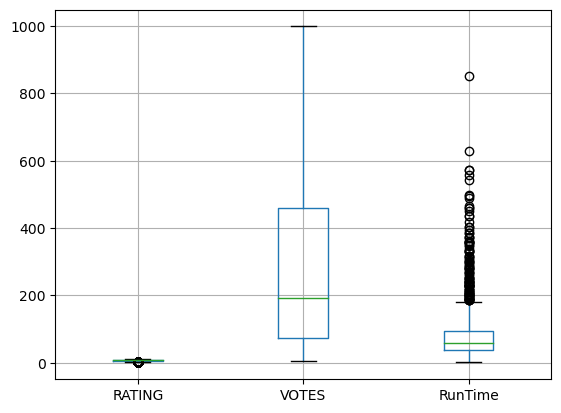

In [98]:
df_num.boxplot()

In [101]:
df_num['RATING'].median()

7.1

In [107]:
df_num.fillna(df_num.median(),inplace=True)

In [131]:
df_cat.mode()

,MOVIES,GENRE,ONE-LINE,STARS
0,Bleach: Burîchi,Comedy,Add a Plot,


In [114]:
df_cat['GENRE'].mode()

0    Comedy
Name: GENRE, dtype: object

In [132]:
df_cat=df_cat.fillna(df_cat.mode())

In [138]:
df_cat['GENRE'].value_counts()

Comedy                             837
Animation, Action, Adventure       663
Drama                              546
Documentary                        495
Crime, Drama, Mystery              328
                                  ... 
Documentary, Adventure, History      1
Comedy, Crime, Romance               1
Drama, Romance, Western              1
Comedy, Drama, Western               1
Crime, Mystery, Romance              1
Name: GENRE, Length: 510, dtype: int64

### 4. Outlier Treatment


In [ ]:
def outlier(df):
    for i in list(df.columns):
        u=df[i].quantile(0.95)
        l=df[i].quantile(0.05)
        df[i]=np.where(df[i]<l,
                       l,
                       (np.where(
                           df[i]>u,
                           u,
                           df[i])))
    return df
        
            
            
        

In [154]:
outlier(df=df_num)

,RATING,VOTES,RunTime
0,6.1,193.0,120.0
1,5.0,193.0,25.0
2,8.2,193.0,44.0
3,8.6,193.0,23.0
4,7.1,193.0,60.0
...,...,...,...
9993,7.1,193.0,60.0
9995,7.1,193.0,60.0
9996,7.1,193.0,60.0
9997,7.1,193.0,60.0


<Axes: >

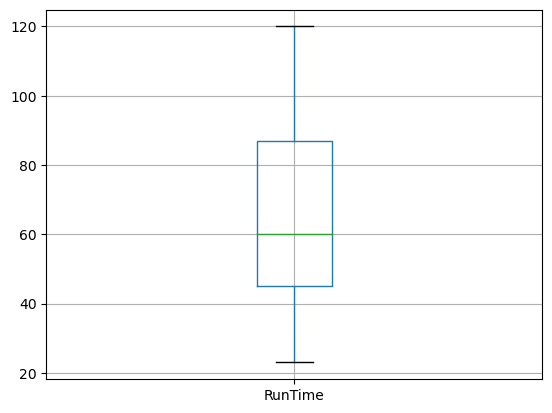

In [163]:
df_num.boxplot(column='RunTime')

see after the outlier treatment 

### 5. Zero Variance

In [169]:
df_num.var()

RATING         0.995498
VOTES      28527.865956
RunTime      784.119346
dtype: float64

If the variance is zero or nearer to zero then that feature is almost same for every record so we can eliminate to reduce the compute cost. here none is nearer to zero nor zero. so we keep all features according to this variance factor.

### 6. Descretization

Data discretization, also known as binning, is the process of grouping continuous values of variables into contiguous intervals. This procedure transforms continuous variables into discrete variables, and it is commonly used in data mining and data science.

here in this case, there is no purpose to do that so let's skip it.

### 7. Feature Encoding

In [176]:
df_cat

,MOVIES,GENRE,ONE-LINE,STARS
0,Blood Red Sky,"Action, Horror, Thriller",A woman with a mysterious illness is forced in...,"Director:PeterThorwarth|Stars:PeriBaumeister,C..."
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",The war for Eternia begins again in what may b...,"Stars:ChrisWood,SarahMichelleGellar,LenaHeadey..."
2,The Walking Dead,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:AndrewLincoln,NormanReedus,MelissaMcBrid..."
3,Rick and Morty,"Animation, Adventure, Comedy",An animated series that follows the exploits o...,"Stars:JustinRoiland,ChrisParnell,SpencerGramme..."
4,Army of Thieves,"Action, Crime, Horror","A prequel, set before the events of Army of th...",Director:MatthiasSchweighöfer|Stars:MatthiasSc...
...,...,...,...,...
9993,Totenfrau,"Drama, Thriller",Add a Plot,"Director:NicolaiRohde|Stars:FelixKlare,RominaK..."
9995,Arcane,"Animation, Action, Adventure",Add a Plot,
9996,Heart of Invictus,"Documentary, Sport",Add a Plot,Director:OrlandovonEinsiedel|Star:PrinceHarry
9997,The Imperfects,"Adventure, Drama, Fantasy",Add a Plot,Director:JovankaVuckovic|Stars:MorganTaylorCam...


here in this case genre is not affective in modeling, so we can better eliminate it.

In [177]:
df_cat.drop('MOVIES',axis=1,inplace=True)

In [225]:
df_cat['STARS']


0       Director:PeterThorwarth|Stars:PeriBaumeister,C...
1       Stars:ChrisWood,SarahMichelleGellar,LenaHeadey...
2       Stars:AndrewLincoln,NormanReedus,MelissaMcBrid...
3       Stars:JustinRoiland,ChrisParnell,SpencerGramme...
4       Director:MatthiasSchweighöfer|Stars:MatthiasSc...
                              ...                        
9993    Director:NicolaiRohde|Stars:FelixKlare,RominaK...
9995                                                     
9996        Director:OrlandovonEinsiedel|Star:PrinceHarry
9997    Director:JovankaVuckovic|Stars:MorganTaylorCam...
9998    Director:JovankaVuckovic|Stars:MorganTaylorCam...
Name: STARS, Length: 9568, dtype: object

In [237]:
df_cat['Director']=df_cat['STARS'].str.extract('Director:(.*?)\|')
df_cat['Stars']=df_cat['STARS'].str.extract('Stars:(.*)')

In [239]:
df_cat.drop('STARS',axis=1,inplace=True)

In [241]:
df_cat.head()

,GENRE,ONE-LINE,Director,Stars
0,"Action, Horror, Thriller",A woman with a mysterious illness is forced in...,PeterThorwarth,"PeriBaumeister,CarlAntonKoch,AlexanderScheer,K..."
1,"Animation, Action, Adventure",The war for Eternia begins again in what may b...,NaN,"ChrisWood,SarahMichelleGellar,LenaHeadey,MarkH..."
2,"Drama, Horror, Thriller",Sheriff Deputy Rick Grimes wakes up from a com...,NaN,"AndrewLincoln,NormanReedus,MelissaMcBride,Laur..."
3,"Animation, Adventure, Comedy",An animated series that follows the exploits o...,NaN,"JustinRoiland,ChrisParnell,SpencerGrammer,Sara..."
4,"Action, Crime, Horror","A prequel, set before the events of Army of th...",MatthiasSchweighöfer,"MatthiasSchweighöfer,NathalieEmmanuel,RubyO.Fe..."


In [242]:
df_cat.isnull().sum()

GENRE         78
ONE-LINE       0
Director    4543
Stars       1203
dtype: int64

In [243]:
df_cat['GENRE']=df_cat['GENRE'].fillna('').str.strip()
df_cat['Director']=df_cat['Director'].fillna('').str.strip()
df_cat['Stars']=df_cat['Stars'].fillna('').str.strip()

In [245]:
df_cat.isnull().sum()

GENRE       0
ONE-LINE    0
Director    0
Stars       0
dtype: int64

In [ ]:
df_cat['GENRE']=df_cat['GENRE'].apply(lambda s: [t.strip() for t in s.split(',')])


In [252]:
df_cat['Director']=df_cat['Director'].apply(lambda s: [t.strip() for t in s.split(',')])


In [254]:
df_cat['Stars']=df_cat['Stars'].apply(lambda s: [t.strip() for t in s.split(',')])
df_cat

,GENRE,ONE-LINE,Director,Stars
0,"[Action, Horror, Thriller]",A woman with a mysterious illness is forced in...,[PeterThorwarth],"[PeriBaumeister, CarlAntonKoch, AlexanderSchee..."
1,"[Animation, Action, Adventure]",The war for Eternia begins again in what may b...,[],"[ChrisWood, SarahMichelleGellar, LenaHeadey, M..."
2,"[Drama, Horror, Thriller]",Sheriff Deputy Rick Grimes wakes up from a com...,[],"[AndrewLincoln, NormanReedus, MelissaMcBride, ..."
3,"[Animation, Adventure, Comedy]",An animated series that follows the exploits o...,[],"[JustinRoiland, ChrisParnell, SpencerGrammer, ..."
4,"[Action, Crime, Horror]","A prequel, set before the events of Army of th...",[MatthiasSchweighöfer],"[MatthiasSchweighöfer, NathalieEmmanuel, RubyO..."
...,...,...,...,...
9993,"[Drama, Thriller]",Add a Plot,[NicolaiRohde],"[FelixKlare, RominaKüper, AnnaMariaMühe, Rober..."
9995,"[Animation, Action, Adventure]",Add a Plot,[],[]
9996,"[Documentary, Sport]",Add a Plot,[OrlandovonEinsiedel],[]
9997,"[Adventure, Drama, Fantasy]",Add a Plot,[JovankaVuckovic],"[MorganTaylorCampbell, IñakiGodoy, RhiannaJagp..."


In [257]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_feats = mlb.fit_transform(df_cat['GENRE'])
genre_feature_names = ['GENRE_'+g for g in mlb.classes_]
genre_df = pd.DataFrame(genre_feats, columns=genre_feature_names, index=df_cat.index)


In [258]:
genre_df

,GENRE_,GENRE_Action,GENRE_Adventure,GENRE_Animation,GENRE_Biography,GENRE_Comedy,GENRE_Crime,GENRE_Documentary,GENRE_Drama,GENRE_Family,...,GENRE_News,GENRE_Reality-TV,GENRE_Romance,GENRE_Sci-Fi,GENRE_Short,GENRE_Sport,GENRE_Talk-Show,GENRE_Thriller,GENRE_War,GENRE_Western
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9995,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
from sklearn.preprocessing import MultiLabelBinarizer

MB=MultiLabelBinarizer()
director_feats=MB.fit_transform(df_cat['Director'])
director_feats_names=['Director_'+t for t in MB.classes_]
dfirector_df=pd.DataFrame(director_feats,columns=director_feats_names,index=df_cat.index)
dfirector_df

,Director_,Director_AadishKeluskar,Director_AaronAugenblick,Director_AaronBurns,Director_AaronLieber,Director_AaronLong,Director_AaronSorkin,Director_AbdelhamidBouchnak,Director_AbhijitPanse,Director_AbhinayDeo,...,Director_ZsoltPálfi,Director_ZulkarnainAzhar,Director_ÁlexdelaIglesia,Director_ÁlvaroBrechner,Director_ÁlvaroFernándezArmero,Director_ÁngelGómezHernández,Director_ÁngelesReiné,Director_ÅkeSandgren,Director_ÓscarPedraza,Director_ÖmerUgur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
from sklearn.preprocessing import MultiLabelBinarizer

MB=MultiLabelBinarizer()
Stars_feats=MB.fit_transform(df_cat['Stars'])
Starts_feats_names=['Star_'+t for t in MB.classes_]
Stars_df=pd.DataFrame(Stars_feats,columns=Starts_feats_names,index=df_cat.index)
Stars_df

,Star_,Star_2'LiveBre,Star_2Chainz,Star_2Mex,Star_50Cent,Star_A.J.Baime,Star_A.J.Daulerio,Star_A.J.LoCascio,Star_A.N.T.I.,Star_ABoogiewitdaHoodie,...,Star_ÖzgeBorak,Star_ÖzgeÖzpirinçci,Star_ÖzgürEmreYildirim,Star_ÖzgürOzan,Star_ÖzkanUgur,Star_ÖzzNûjen,Star_ÚrsulaCorberó,Star_ÚrsulaPruneda,Star_ÜlküDuru,Star_ÞorsteinnBachmann
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
from sklearn.decomposition import TruncatedSVD

ts=TruncatedSVD(n_components=50)
directors_final=ts.fit_transform(dfirector_df)
directors_final=pd.DataFrame(directors_final)



In [296]:
directors_final

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.018069e-22,-3.205588e-10,2.663811e-09,2.072832e-09,-6.052453e-09,-2.996421e-08,-1.102345e-08,2.776055e-08,3.402884e-08,-1.764218e-08,...,1.107184e-06,-4.680341e-07,-4.522075e-07,-8.595209e-07,-1.195881e-06,-3.579199e-07,-1.172803e-06,-6.988353e-07,3.359894e-06,-1.276263e-06
1,1.000000e+00,-7.840673e-16,-1.329332e-17,1.271666e-16,-4.549023e-17,-1.632095e-18,-3.951740e-18,-2.468443e-18,-1.728959e-18,1.522160e-18,...,1.466631e-19,1.850561e-19,-1.331500e-19,2.295269e-19,6.574422e-20,-1.821615e-19,2.169416e-19,3.462350e-19,-8.798232e-20,4.233594e-19
2,1.000000e+00,-7.840673e-16,-1.329332e-17,1.271666e-16,-4.549023e-17,-1.632095e-18,-3.951740e-18,-2.468443e-18,-1.728959e-18,1.522160e-18,...,1.466631e-19,1.850561e-19,-1.331500e-19,2.295269e-19,6.574422e-20,-1.821615e-19,2.169416e-19,3.462350e-19,-8.798232e-20,4.233594e-19
3,1.000000e+00,-7.840673e-16,-1.329332e-17,1.271666e-16,-4.549023e-17,-1.632095e-18,-3.951740e-18,-2.468443e-18,-1.728959e-18,1.522160e-18,...,1.466631e-19,1.850561e-19,-1.331500e-19,2.295269e-19,6.574422e-20,-1.821615e-19,2.169416e-19,3.462350e-19,-8.798232e-20,4.233594e-19
4,-4.963807e-24,-1.394604e-10,1.570500e-10,-3.658836e-09,9.670065e-10,-1.137963e-08,-2.074813e-08,-1.052184e-08,-1.370845e-08,5.788184e-09,...,1.143836e-06,-6.475784e-07,-5.444550e-08,-1.308392e-07,-4.521400e-07,6.322214e-07,-5.130770e-07,-1.030385e-06,-5.203374e-08,2.406715e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,-5.042853e-23,6.332411e-10,-2.645882e-09,4.215201e-09,1.072501e-09,2.923527e-08,-8.231783e-09,1.661119e-08,1.851913e-08,-1.449565e-08,...,9.925994e-07,-5.332910e-07,-1.032630e-06,-1.756635e-07,-1.031082e-06,5.064684e-07,-8.366842e-07,4.782871e-07,3.247080e-07,-6.446480e-07
9564,1.000000e+00,-7.840673e-16,-1.329332e-17,1.271666e-16,-4.549023e-17,-1.632095e-18,-3.951740e-18,-2.468443e-18,-1.728959e-18,1.522160e-18,...,1.466631e-19,1.850561e-19,-1.331500e-19,2.295269e-19,6.574422e-20,-1.821615e-19,2.169416e-19,3.462350e-19,-8.798232e-20,4.233594e-19
9565,-2.077861e-20,7.848347e-07,-9.132465e-06,-1.047892e-05,2.831138e-05,3.233782e-06,-7.561807e-06,-6.347245e-05,-1.090004e-04,-3.393492e-05,...,-1.885359e-03,4.217192e-03,-1.651677e-04,-1.213786e-03,-8.800393e-04,-2.445015e-03,4.469151e-03,-3.620565e-03,5.494273e-03,-5.148102e-03
9566,4.095366e-22,2.262925e-08,1.689490e-07,3.326246e-08,2.980147e-07,1.598223e-06,2.998000e-07,-6.217149e-08,1.420178e-06,2.759355e-07,...,-3.764740e-05,-2.124036e-05,-6.922037e-06,3.236957e-05,-1.590887e-05,-2.814688e-05,1.851763e-05,1.081938e-06,-9.447362e-05,-2.456727e-06


In [297]:
from sklearn.decomposition import TruncatedSVD

tsv=TruncatedSVD(n_components=50)
stars_final=ts.fit_transform(Stars_df)
stars_final=pd.DataFrame(stars_final)
stars_final



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-4.566387e-14,2.949169e-10,8.310222e-11,1.476040e-09,-2.872015e-09,4.038094e-09,3.161984e-09,2.598615e-10,-4.951835e-09,-4.333682e-08,...,-9.518808e-07,-1.554224e-07,-4.350793e-07,-1.160690e-06,1.936247e-06,9.150731e-07,-1.497890e-06,1.619879e-06,1.523230e-07,-9.538281e-07
1,-2.712806e-11,-9.850531e-07,-1.311064e-06,-1.776421e-06,5.026884e-06,-2.482362e-05,-9.587502e-07,4.292441e-06,2.639843e-05,-8.071522e-05,...,-5.023373e-03,-5.738716e-04,1.665770e-03,3.425965e-03,-2.255673e-03,-2.838499e-03,3.721153e-04,4.316792e-03,-6.596301e-03,-1.872418e-02
2,-8.741805e-13,3.544047e-09,6.474757e-09,6.089095e-08,-1.344317e-08,1.270585e-07,1.207662e-07,-4.895751e-09,2.511442e-08,-2.108651e-06,...,1.659775e-05,1.155869e-05,-1.102504e-05,1.491547e-06,3.767366e-05,1.953457e-05,3.546123e-05,-5.491094e-05,2.468751e-05,1.456066e-05
3,-1.859780e-09,2.748664e-05,-2.329676e-05,9.540005e-05,-1.807286e-04,-4.298374e-04,-1.076794e-04,-5.235315e-04,-4.772227e-04,-1.241708e-02,...,4.862752e-02,-5.135936e-02,-1.087893e-01,-2.224423e-01,1.608800e-01,-1.270871e-01,-1.199044e-01,2.078024e-01,2.243837e-01,6.259050e-02
4,4.242175e-13,-5.892304e-10,-1.553507e-09,-2.065109e-08,7.993338e-09,-4.256497e-10,-4.464879e-09,2.210194e-08,-1.614588e-08,-2.994223e-07,...,5.100706e-06,5.375398e-06,-2.870414e-07,-1.715647e-06,-3.745775e-06,1.145371e-06,-6.620532e-06,1.296867e-05,5.209308e-06,1.000959e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,2.755281e-14,1.062968e-09,-4.023015e-09,7.253793e-08,1.296371e-08,-1.200592e-08,-1.962924e-08,4.277577e-08,1.255500e-07,2.619858e-06,...,-8.193007e-06,-2.853852e-05,-1.846152e-05,-3.665193e-05,-2.824898e-05,2.543494e-05,-4.552615e-05,3.958154e-05,-3.258694e-05,-2.111947e-05
9564,1.000000e+00,-1.640351e-13,-2.805960e-14,6.717574e-14,-1.538446e-13,5.712898e-15,5.167440e-13,5.922982e-14,6.540531e-13,6.570571e-12,...,-1.218135e-11,2.364718e-11,6.580719e-12,-1.309832e-11,-3.602297e-12,5.319867e-12,8.916810e-12,-1.069861e-11,-4.248889e-12,-4.921073e-12
9565,1.000000e+00,-1.640351e-13,-2.805960e-14,6.717574e-14,-1.538446e-13,5.712898e-15,5.167440e-13,5.922982e-14,6.540531e-13,6.570571e-12,...,-1.218135e-11,2.364718e-11,6.580719e-12,-1.309832e-11,-3.602297e-12,5.319867e-12,8.916810e-12,-1.069861e-11,-4.248889e-12,-4.921073e-12
9566,-3.537710e-14,8.428357e-08,9.912118e-08,3.553163e-07,2.890986e-07,-2.032947e-07,-3.410186e-07,-1.492406e-06,4.792652e-07,1.063993e-05,...,-2.825329e-04,-4.743303e-04,8.467842e-05,-6.352882e-05,-6.203774e-05,-6.354310e-06,-1.867807e-04,2.431151e-05,-9.021788e-05,-2.539200e-04
